In [26]:
%load_ext nb_black
import sys
import warnings

# add pathway to config files
sys.path.append("../")

import joblib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 


# import MESMER tools
from mesmer.io import load_cmipng, load_obs, load_regs_ls_wgt_lon_lat
from mesmer.utils import convert_dict_to_arr, extract_land

# load in configurations used in this script
import configs.config_across_scen_T_cmip6ng_sspall_default as cfg


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Load in all the necessary data

In [27]:
print("Load in the CMIP6 ESM runs")

# specify the target variable
targ = cfg.targs[0]
print(targ)

# load in the ESM runs
esms = cfg.esms
scenarios = cfg.scenarios
print(esms)
print(len(esms))

# load in tas with global coverage
tas_g_dict = {}  # tas with global coverage
GSAT_dict = {}  # global mean tas
tas_g = {}
GSAT = {}
time = {}

for esm in esms:
    print(esm)
    tas_g_dict[esm] = {}
    GSAT_dict[esm] = {}
    time[esm] = {}

    for scen in scenarios:

        tas_g_tmp, GSAT_tmp, lon_tmp, lat_tmp, time_tmp = load_cmipng(
            targ, esm, scen, cfg
        )

        if tas_g_tmp is None:
            warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
        else:  # if scen exists: save fields
            tas_g_dict[esm][scen], GSAT_dict[esm][scen], lon, lat, time[esm][scen] = (
                tas_g_tmp,
                GSAT_tmp,
                lon_tmp,
                lat_tmp,
                time_tmp,
            )

    tas_g[esm] = convert_dict_to_arr(tas_g_dict[esm])
    GSAT[esm] = convert_dict_to_arr(GSAT_dict[esm])

# load in the constant files
reg_dict, ls, wgt_g, lon, lat = load_regs_ls_wgt_lon_lat(cfg.reg_type, lon, lat)

# extract land
tas, reg_dict, ls = extract_land(
    tas_g, reg_dict, wgt_g, ls, threshold_land=cfg.threshold_land
)

Load in the CMIP6 ESM runs
tas
['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'CanESM5', 'CESM2', 'CESM2-WACCM', 'CMCC-CM2-SR5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'E3SM-1-1', 'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'IPSL-CM6A-LR', 'MCM-UA-1-0', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL']
25
ACCESS-CM2


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM ACCESS-CM2
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM ACCESS-CM2
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM ACCESS-CM2
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM ACCESS-CM2
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


ACCESS-ESM1-5


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM ACCESS-ESM1-5
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM ACCESS-ESM1-5
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM ACCESS-ESM1-5
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM ACCESS-ESM1-5
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


AWI-CM-1-1-MR


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM AWI-CM-1-1-MR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM AWI-CM-1-1-MR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM AWI-CM-1-1-MR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM AWI-CM-1-1-MR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


CanESM5
CESM2


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM CESM2
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM CESM2
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM CESM2
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM CESM2
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


CESM2-WACCM


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM CESM2-WACCM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM CESM2-WACCM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM CESM2-WACCM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


CMCC-CM2-SR5


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM CMCC-CM2-SR5
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM CMCC-CM2-SR5
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM CMCC-CM2-SR5
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM CMCC-CM2-SR5
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


CNRM-CM6-1


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM CNRM-CM6-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM CNRM-CM6-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM CNRM-CM6-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM CNRM-CM6-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


CNRM-CM6-1-HR


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM CNRM-CM6-1-HR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM CNRM-CM6-1-HR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM CNRM-CM6-1-HR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM CNRM-CM6-1-HR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


CNRM-ESM2-1


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM CNRM-ESM2-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


E3SM-1-1


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp370 does not exist for tas for ESM E3SM-1-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM E3SM-1-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp245 does not exist for tas for ESM E3SM-1-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM E3SM-1-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM E3SM-1-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp126 does not e

FGOALS-f3-L


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM FGOALS-f3-L
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM FGOALS-f3-L
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM FGOALS-f3-L
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM FGOALS-f3-L
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


FGOALS-g3


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM FGOALS-g3
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


FIO-ESM-2-0


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp370 does not exist for tas for ESM FIO-ESM-2-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM FIO-ESM-2-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM FIO-ESM-2-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM FIO-ESM-2-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM FIO-ESM-2-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


HadGEM3-GC31-LL


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp370 does not exist for tas for ESM HadGEM3-GC31-LL
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM HadGEM3-GC31-LL
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM HadGEM3-GC31-LL
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM HadGEM3-GC31-LL
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM HadGEM3-GC31-LL
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


HadGEM3-GC31-MM


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp370 does not exist for tas for ESM HadGEM3-GC31-MM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM HadGEM3-GC31-MM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp245 does not exist for tas for ESM HadGEM3-GC31-MM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM HadGEM3-GC31-MM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM HadGEM3-GC31-MM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWa

IPSL-CM6A-LR
MCM-UA-1-0


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM MCM-UA-1-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM MCM-UA-1-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM MCM-UA-1-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM MCM-UA-1-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


MPI-ESM1-2-HR


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM MPI-ESM1-2-HR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM MPI-ESM1-2-HR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM MPI-ESM1-2-HR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM MPI-ESM1-2-HR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


MPI-ESM1-2-LR


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM MPI-ESM1-2-LR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM MPI-ESM1-2-LR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM MPI-ESM1-2-LR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM MPI-ESM1-2-LR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


MRI-ESM2-0
NESM3


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp370 does not exist for tas for ESM NESM3
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM NESM3
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM NESM3
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM NESM3
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM NESM3
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


NorESM2-LM


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM NorESM2-LM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM NorESM2-LM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM NorESM2-LM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


NorESM2-MM


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM NorESM2-MM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM NorESM2-MM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM NorESM2-MM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM NorESM2-MM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


UKESM1-0-LL


/tmp/ipykernel_31145/4091488400.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM UKESM1-0-LL
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


<IPython.core.display.Javascript object>

In [28]:
print("Load in the observations")
tblend_g_obs = {}
GMST_obs = {}
time_obs = {}
targ_obs = "tblend"
prods = ["best"]
for prod in prods:
    tblend_g_obs[prod], GMST_obs[prod], time_obs = load_obs(
        targ_obs, prod, lon, lat, cfg, sel_ref="native", ignore_nans=False
    )

tblend_obs, reg_dict, ls = extract_land(
    tblend_g_obs, reg_dict, wgt_g, ls, threshold_land=cfg.threshold_land
)

Load in the observations


<IPython.core.display.Javascript object>

In [29]:
print('Load in the quantiles of the regional averages of the emulations')
reg_emu_quantiles={}


regs = ['global','global_land','ENA']
for reg in regs:
    reg_emu_quantiles[reg]=joblib.load(cfg.dir_stats+reg+'_quantiles.pkl')
    
idx_ENA_gp = 1317
reg_emu_quantiles['ENA_gp']=joblib.load(cfg.dir_stats+'gp_level/'+str(idx_ENA_gp)+'_quantiles.pkl')



Load in the quantiles of the regional averages of the emulations


<IPython.core.display.Javascript object>

# Create the regional averages for the ESM runs and the observations

In [30]:
print("Create the regional averages for the ESM runs")
reg_esms = {}

reg_esms["global"] = {}
for scen in scenarios:
    reg_esms["global"][scen] = {}
    for esm in cfg.esms:
        if scen in GSAT[esm].keys():
            reg_esms["global"][scen][esm] = GSAT[esm][scen]

regs = ["global_land", "ENA", "ENA_gp"]
for reg in regs:
    reg_esms[reg] = {}
    if reg == "global_land":
        wgt_gps_l = np.sum(reg_dict["wgt_gps_l"], axis=0)
    elif reg == "ENA_gp":
        wgt_gps_l = np.zeros(reg_dict["wgt_gps_l"].shape[1])
        wgt_gps_l[idx_ENA_gp] = 1
    else:
        idx_reg = reg_dict["abbrevs"].index(reg)
        wgt_gps_l = reg_dict["wgt_gps_l"][idx_reg]
    for scen in scenarios:
        reg_esms[reg][scen] = {}
        for esm in esms:
            if scen in tas[esm].keys():
                reg_esms[reg][scen][esm] = np.average(
                    tas[esm][scen], weights=wgt_gps_l, axis=2
                )

Create the regional averages for the ESM runs


<IPython.core.display.Javascript object>

In [31]:
print("Create the regional averages for the observations")
prod = "best"
reg_obs = {}

# convert GMST to GSAT according to formula derived by Beusch et al 2020 GRL
#  https://doi.org/10.1029/2019GL086812 -> supp. info Fig S2
reg_obs["global"] = np.squeeze(1.098 * GMST_obs[prod]["obs"] - 0.001)


# compute reg averages of all other regions
reg = "global_land"
wgt_gps_l = np.sum(reg_dict["wgt_gps_l"], axis=0)
reg_obs[reg] = np.squeeze(
    np.average(tblend_obs[prod]["obs"], weights=wgt_gps_l, axis=2)
)

reg = "ENA"
reg_obs[reg] = {}
idx_reg = reg_dict["abbrevs"].index(reg)
wgt_gps_l = reg_dict["wgt_gps_l"][idx_reg]
# fix because all weights get considered in np.average, ENA ends up with nans prior to 1890
# despite all gps within ENA containing values -> just replace nans with 0s for ENA calc
tmp = np.nan_to_num(tblend_obs[prod]["obs"])
reg_obs[reg] = np.squeeze(np.average(tmp, weights=wgt_gps_l, axis=2))

reg = "ENA_gp"
reg_obs[reg] = np.squeeze(tblend_obs[prod]["obs"])[:, idx_ENA_gp]

Create the regional averages for the observations


<IPython.core.display.Javascript object>

# Plotting information for both Figures

In [32]:
col = {}
col["h-ssp119"] = "#0571b0"
col["h-ssp245"] = "#33a02c"
col["h-ssp370"] = "#ca0020"


reg_names = {}
reg_names["global"] = "Global"
reg_names["global_land"] = "Global land"
reg_names["ENA"] = "E. North America"
reg_names["ENA_gp"] = "E. North America grid point"

<IPython.core.display.Javascript object>

# Figure 6

In [33]:
def plot_reg_ssp(reg, scen, ytick=False, xtick=True, legend=False):
    time_plt = np.arange(1850, 2101)
    for esm in reg_esms[reg][scen].keys():
        plt.plot(
            time_plt, reg_esms[reg][scen][esm][0], color="grey", lw=0.5
        )  #'#b2df8a'

    plt.plot(time_plt, reg_emu_quantiles[reg][scen][0.5], zorder=101, color=col[scen])
    plt.fill_between(
        time_plt,
        reg_emu_quantiles[reg][scen][0.05],
        reg_emu_quantiles[reg][scen][0.95],
        alpha=0.5,
        zorder=100,
        facecolor=col[scen],
        edgecolor="none",
    )

    plt.xlim([2015, 2100])
    plt.xticks(np.arange(2030, 2101, 30))
    plt.ylim([-0.4, 9])

    if ytick is False:
        plt.gca().yaxis.set_major_formatter(plt.NullFormatter())
    else:
        if scen == "h-ssp370":
            plt.ylabel("SSP3-7.0\n$\Delta$T [°C]")
        elif scen == "h-ssp119":
            plt.ylabel("SSP1-1.9\n$\Delta$T [°C]")
        else:
            plt.ylabel(scen + "\n$\Delta$T [°C]")

    if xtick is False:
        plt.title(reg_names[reg])
        plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
    else:
        plt.xlabel("Year [-]")

<IPython.core.display.Javascript object>

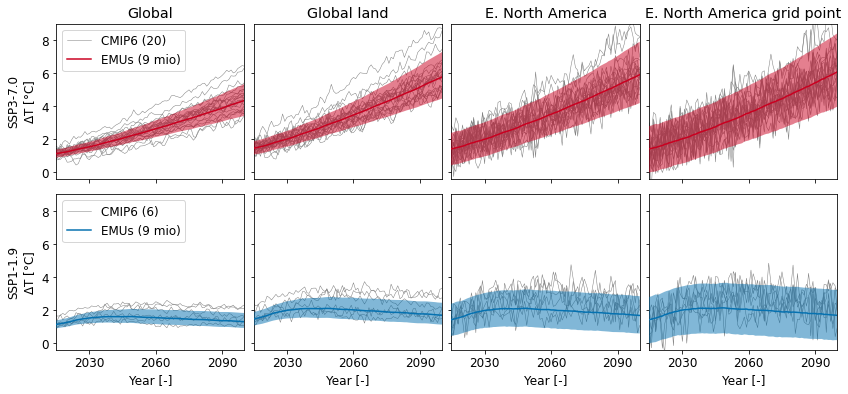

<IPython.core.display.Javascript object>

In [34]:
scens = ["h-ssp370", "h-ssp119"]
fig = plt.figure(figsize=(14, 6))
plt.rcParams.update({"font.size": 12})

grid = plt.GridSpec(2, 4, wspace=0.05, hspace=0.1)  # create a grid for the subplots

regs = ["global", "global_land", "ENA", "ENA_gp"]

for j, scen in enumerate(scens):
    if j == 0:
        xtick = False
    else:
        xtick = True
    for i, reg in enumerate(regs):
        if i == 0:
            ytick = True
        else:
            ytick = False
        ax1 = plt.subplot(grid[j, i])
        plot_reg_ssp(reg, scen, xtick=xtick, ytick=ytick)

        if i == 0:
            custom_lines = [
                Line2D([0], [0], color="grey", lw=0.5),
                Line2D([0], [0], color=col[scen]),
            ]
            plt.legend(
                custom_lines,
                [f"CMIP6 ({len(reg_esms[reg][scen].keys())})", "EMUs (9 mio)"],
                loc=2,
            )

#plt.savefig(cfg.dir_plots+'ts_emus_cmip6_g_gl_ENA_ENAgp_'+"_".join(scens)+'.png' ,dpi=200 ,bbox_inches='tight')
#plt.savefig(cfg.dir_plots+'ts_emus_cmip6_g_gl_ENA_ENAgp_'+"_".join(scens)+'.pdf' ,dpi=200 ,bbox_inches='tight')

# Figure 7

In [35]:
def plot_reg_hist(reg, ytick=False, xtick=True):
    time_plt = np.arange(1850, 2101)
    for esm in reg_esms[reg][scen].keys():
        plt.plot(time_plt, reg_esms[reg][scen][esm][0], color="grey", lw=0.5)

    plt.plot(time_plt, reg_emu_quantiles[reg][scen][0.5], zorder=101, color=col[scen])
    plt.fill_between(
        time_plt,
        reg_emu_quantiles[reg][scen][0.05],
        reg_emu_quantiles[reg][scen][0.95],
        alpha=0.5,
        zorder=100,
        facecolor=col[scen],
        edgecolor="none",
    )

    # plot obs on 1850-1900 baseline too
    idx_best = np.logical_and(
        time[esm]["h-ssp245"] >= 1951, time[esm]["h-ssp245"] <= 1980
    )
    # offest by the median estimate of the emus to shift obs to 1850 - 1900 baseline period
    # without needing to rely on the spatially incomplete obs with lower quality of 1850 - 1900 period
    plt.plot(
        time_obs,
        reg_obs[reg] + np.mean(reg_emu_quantiles[reg][scen][0.5][idx_best]),
        color="k",
        lw=1,
    )

    plt.xlim([1850, 2020])
    plt.xticks(np.arange(1880, 2021, 40))
    plt.ylim([-2.5, 3.5])

    plt.title(reg_names[reg])

    if ytick is False:
        plt.gca().yaxis.set_major_formatter(plt.NullFormatter())
    else:
        if scen == "h-ssp245":
            plt.ylabel("Historical + SSP2-4.5\n$\Delta$T [°C]")
        else:
            plt.ylabel(scen + "\n$\Delta$T [°C]")

    if xtick is False:
        plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
    else:
        plt.xlabel("Year [-]")

<IPython.core.display.Javascript object>

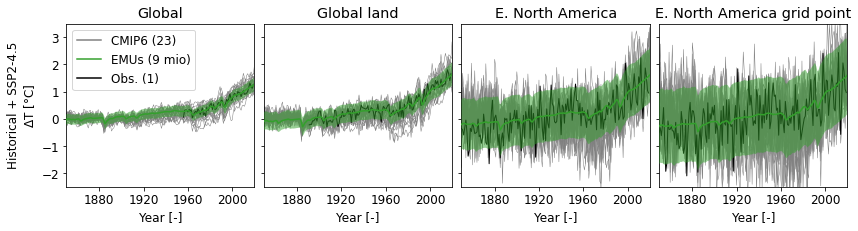

<IPython.core.display.Javascript object>

In [36]:
scen='h-ssp245'
fig=plt.figure(figsize=(14, 3))
plt.rcParams.update({'font.size': 12})

grid = plt.GridSpec(1, 4, wspace=0.05, hspace=0.) # create a grid for the subplots

regs = ['global','global_land','ENA','ENA_gp']

for i,reg in enumerate(regs):
    ax1 = plt.subplot(grid[0,i])
    if i == 0:
        plot_reg_hist(reg,ytick=True)

    else:
        plot_reg_hist(reg)
    
    if i == 0:
        custom_lines = [Line2D([0], [0], color='grey'),
                Line2D([0], [0],color=col[scen]),
                       Line2D([0], [0],color='k'),] 
        plt.legend(custom_lines, [f'CMIP6 ({len(reg_esms[reg][scen].keys())})','EMUs (9 mio)', 'Obs. (1)'],loc=2)

#plt.savefig(cfg.dir_plots+'ts_emus_cmip6_obs_g_gl_ENA_ENAgp_'+scen+'.png' ,dpi=200 ,bbox_inches='tight')
#plt.savefig(cfg.dir_plots+'ts_emus_cmip6_obs_g_gl_ENA_ENAgp_'+scen+'.pdf' ,dpi=200 ,bbox_inches='tight')

